# Data exploration

I have exported my data from Polar watch. Exploring what is there 

In [2]:
import glob
import os
import json
import random
import pandas as pd
import matplotlib.pyplot as plt

Define consts

In [3]:
DATA_DIR = "/Users/arbatov/gitRepo/gpx-data/data"

## Get the data

Load the files

In [4]:
json_files = glob.glob(os.path.join(DATA_DIR,"*.json"))

How many files?

In [5]:
print(len(json_files))

815


How big are all of the files?

In [6]:
nbytes = sum(d.stat().st_size for d in os.scandir(DATA_DIR) if d.is_file())
print(float(nbytes) / 1024**3, "GB")

1.7585922731086612 GB


## Overview of data

Get a sample of data

In [36]:
def get_sample():  
    file_contents = []
    
    for json_file in json_files:
        with open(json_file) as file:
            j = json.load(file)
            
            file_contents.append([
                os.path.basename(json_file),
                j['exercises'][0]['sport'],
                j['startTime'],
                j['stopTime'],
                j['distance'] if 'distance' in j else 0,
                j['duration'],
                j['maximumHeartRate'] if 'maximumHeartRate' in j else 0,
                j['averageHeartRate'] if 'averageHeartRate' in j else 0
            ])

    return file_contents

Import data into Pandas

In [37]:
data = get_sample()
data_df = pd.DataFrame(data, columns=[
    'File_Name', 
    'Sport',
    'Start_Time',
    'Stop_Time',
    'Distance',
    'Duration',
    'Maximum_Heart_Rate',
    'Average_Heart_Rate'
])

Add duration

In [38]:
data_df['Start_Time'] = pd.to_datetime(data_df['Start_Time'])
data_df['Stop_Time'] = pd.to_datetime(data_df['Stop_Time'])
data_df['Duration_Seconds'] = (data_df['Stop_Time'] - data_df['Start_Time']).dt.seconds

Check how my data looks

In [46]:
data_df.head()

,File_Name,Sport,Start_Time,Stop_Time,Distance,Duration,Maximum_Heart_Rate,Average_Heart_Rate,Duration_Seconds,Year,Month,Week
0,training-session-2020-12-25-5476127809-b9f3191...,RUNNING,2020-12-25 06:23:41.125,2020-12-25 07:49:44.752,14837.000000,PT4994.753S,167,154,5163,2020,12,52
1,training-session-2021-12-30-6850109034-2812b0a...,OPEN_WATER_SWIMMING,2021-12-30 07:03:43.324,2021-12-30 07:37:56.742,0.000000,PT2046.502S,175,140,2053,2021,12,52
2,training-session-2020-07-31-4953476066-34bba44...,CYCLING,2020-07-31 05:35:52.069,2020-07-31 07:00:53.151,30768.300781,PT5096.502S,142,113,5101,2020,7,31
3,training-session-2021-10-10-6599866044-c53ee77...,OPEN_WATER_SWIMMING,2021-10-10 07:01:12.204,2021-10-10 07:29:53.611,0.000000,PT1716.877S,155,136,1721,2021,10,40
4,training-session-2022-04-30-7281723235-4027a36...,STRETCHING,2022-04-30 22:56:04.714,2022-04-30 23:24:21.516,0.000000,PT1692.002S,119,81,1696,2022,4,17


Get the data types

In [40]:
data_df.dtypes

File_Name                     object
Sport                         object
Start_Time            datetime64[ns]
Stop_Time             datetime64[ns]
Distance                     float64
Duration                      object
Maximum_Heart_Rate             int64
Average_Heart_Rate             int64
Duration_Seconds               int64
dtype: object

What kind of activities are there?

In [47]:
data_df.groupby('Sport').Sport.count()

Sport
CYCLING                  44
INDOOR_CYCLING           10
OPEN_WATER_SWIMMING     108
POOL_SWIMMING            34
ROAD_RUNNING              3
RUNNING                 424
STRENGTH_TRAINING        64
STRETCHING              100
SWIMMING                  1
TREADMILL_RUNNING         9
WALKING                   7
WATERSPORTS_KAYAKING      3
YOGA                      8
Name: Sport, dtype: int64

## Plotting data

Breakdown data by week / month / year

In [48]:
data_df['Year'] = data_df['Start_Time'].apply(lambda x: x.year)
data_df['Month'] = data_df['Start_Time'].apply(lambda x: x.month)
data_df['Week'] = data_df['Start_Time'].apply(lambda x: x.week)

Running distance by year

Text(0, 0.5, 'Distance (km)')

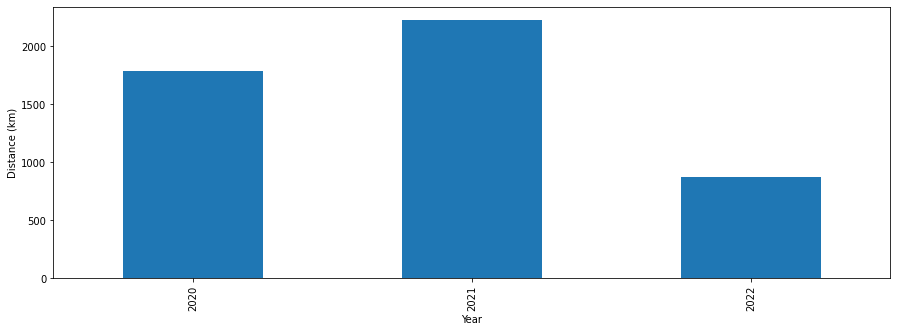

In [49]:
data_df[data_df.Sport == "RUNNING"]\
    .groupby(['Year'])\
    .apply(lambda x: x['Distance'].sum()/1000)\
    .plot(kind='bar', figsize=(15,5))
plt.ylabel('Distance (km)')

Running distance by week in 2021

Text(0, 0.5, 'Distance (km)')

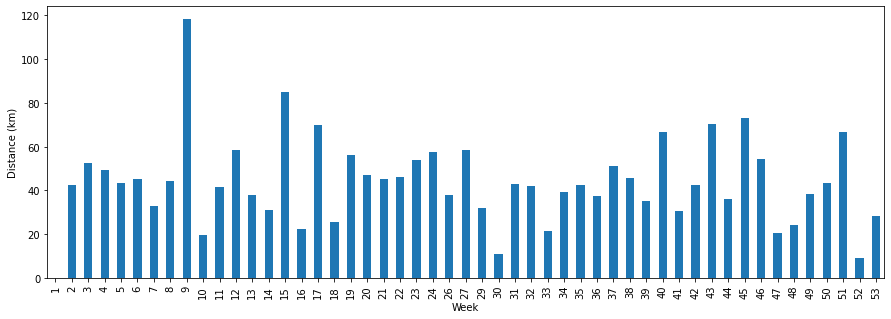

In [56]:
data_df[(data_df.Sport == "RUNNING") & (data_df.Year == 2021)]\
    .groupby(['Week'])\
    .apply(lambda x: x['Distance'].sum()/1000)\
    .plot(kind='bar', figsize=(15,5))
plt.ylabel('Distance (km)')

Cycling distance by year

Text(0, 0.5, 'Distance (km)')

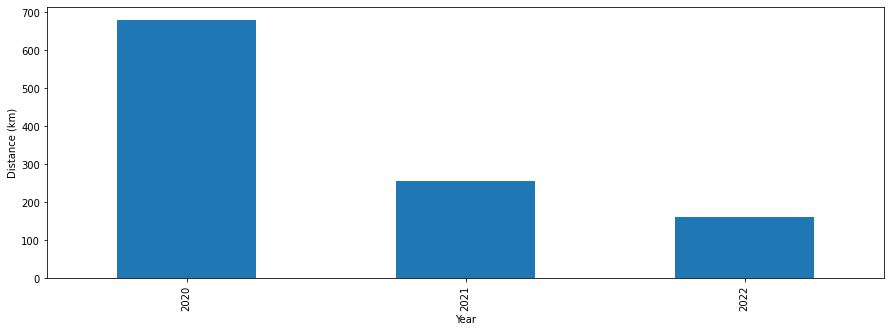

In [57]:
data_df[data_df.Sport == "CYCLING"]\
    .groupby(['Year'])\
    .apply(lambda x: x['Distance'].sum()/1000)\
    .plot(kind='bar', figsize=(15,5))
plt.ylabel('Distance (km)')

Cyclingdistance by week in 2020

Text(0, 0.5, 'Distance (km)')

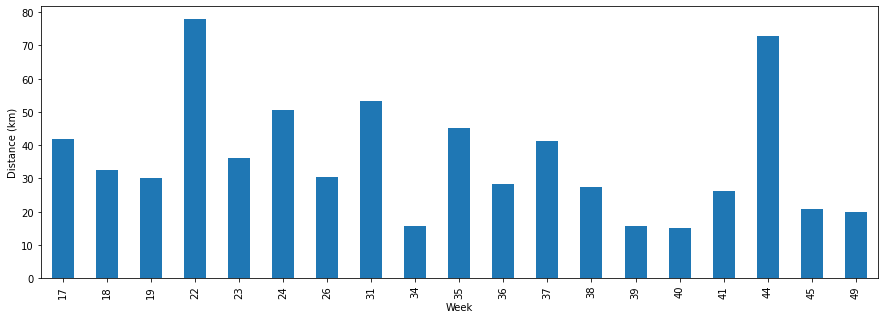

In [58]:
data_df[(data_df.Sport == "CYCLING") & (data_df.Year == 2020)]\
    .groupby(['Week'])\
    .apply(lambda x: x['Distance'].sum()/1000)\
    .plot(kind='bar', figsize=(15,5))
plt.ylabel('Distance (km)')